<a href="https://colab.research.google.com/github/imcinstitute/ML-labs/blob/main/TopGunModelV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

!gsutil cp gs://lmnugpot/data/shortlist.csv .
jsk = pd.read_csv("shortlist.csv")

Copying gs://lmnugpot/data/shortlist.csv...
/ [1 files][  6.2 MiB/  6.2 MiB]                                                
Operation completed over 1 objects/6.2 MiB.                                      


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
jsk.shape

(45943, 52)

In [ ]:
jsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45943 entries, 0 to 45942
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _ID_                  45943 non-null  int64  
 1   ID_EMP                45886 non-null  float64
 2   ID_REF_TRACK          45943 non-null  int64  
 3   ID_POSITION_ASSIGN    45943 non-null  int64  
 4   SHORT_LIST_STATUS     45943 non-null  int64  
 5   AGE                   45943 non-null  int64  
 6   ID_CITY               45891 non-null  float64
 7   HEIGHT                45943 non-null  float64
 8   WEIGHT                45943 non-null  float64
 9   GENDER_NUM            45943 non-null  int64  
 10  EXP_STATUS            45942 non-null  object 
 11  EXP_COMPANY           45943 non-null  int64  
 12  EXP_YEAR              45943 non-null  int64  
 13  EXP_FULL_YEAR         45560 non-null  float64
 14  EXP_PT_YEAR           44745 non-null  float64
 15  degree1_count      

In [ ]:
jsk['ID_EMP'].value_counts()

5.0       25504
3349.0    18841
945.0       646
4490.0      414
46.0        311
1050.0       85
321.0        85
Name: ID_EMP, dtype: int64

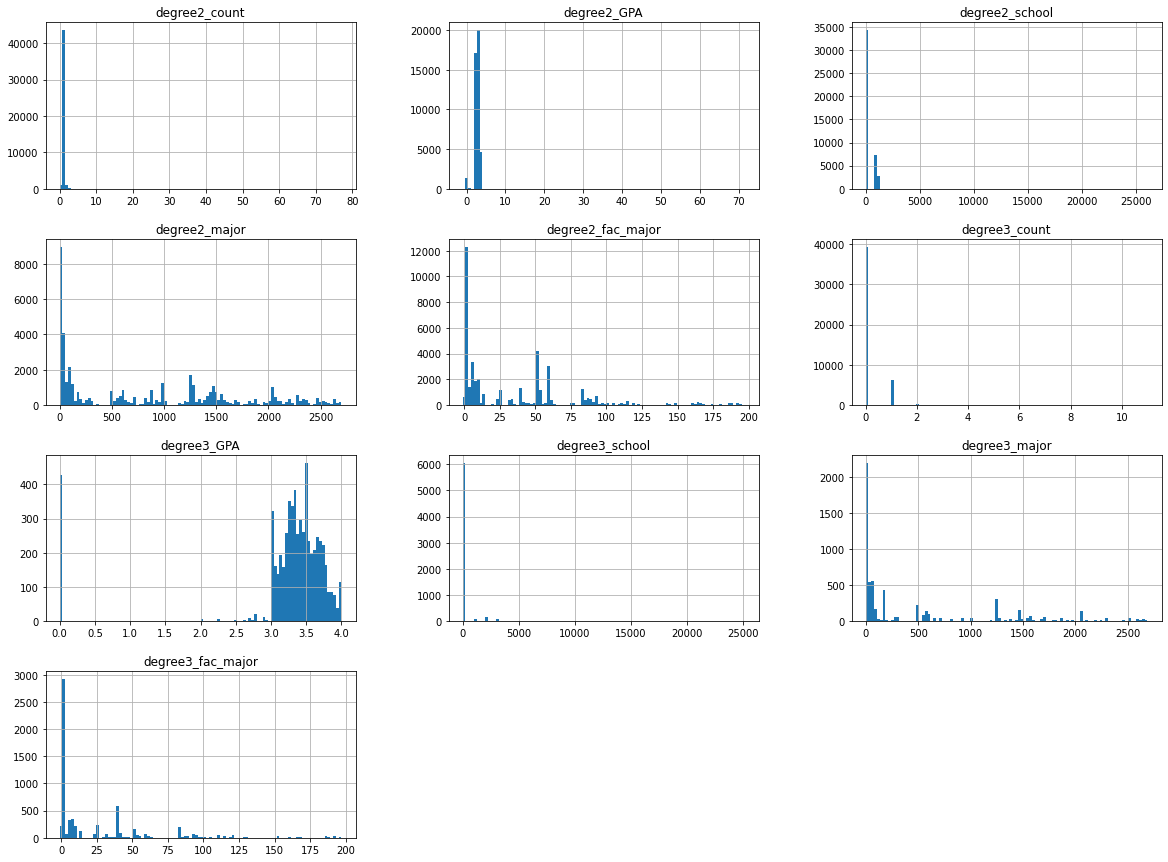

In [ ]:
jsk[jsk.columns[20:30]].hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
jsk[jsk.columns[1:20]].describe()

ID_EMP  ID_REF_TRACK  ...  degree1_major  degree1_fac_major
count  45886.000000  4.594300e+04  ...    2494.000000        2494.000000
mean    1434.559561  4.809849e+07  ...      -0.004812           0.000401
std     1656.527365  1.071436e+07  ...       0.069212           0.020024
min        5.000000 -3.000000e+00  ...      -1.000000           0.000000
25%        5.000000  4.797786e+07  ...       0.000000           0.000000
50%        5.000000  5.106968e+07  ...       0.000000           0.000000
75%     3349.000000  5.263033e+07  ...       0.000000           0.000000
max     4490.000000  5.595991e+07  ...       0.000000           1.000000

[8 rows x 18 columns]

In [ ]:
jsk.isnull().sum()

_ID_                        0
ID_EMP                     57
ID_REF_TRACK                0
ID_POSITION_ASSIGN          0
SHORT_LIST_STATUS           0
AGE                         0
ID_CITY                    52
HEIGHT                      0
WEIGHT                      0
GENDER_NUM                  0
EXP_STATUS                  1
EXP_COMPANY                 0
EXP_YEAR                    0
EXP_FULL_YEAR             383
EXP_PT_YEAR              1198
degree1_count               7
degree1_GPA             43581
degree1_school          43445
degree1_major           43449
degree1_fac_major       43449
degree2_count               7
degree2_GPA              2769
degree2_school           1121
degree2_major            1121
degree2_fac_major        1121
degree3_count               7
degree3_GPA             39941
degree3_school          39331
degree3_major           39331
degree3_fac_major       39331
degree4_count               7
degree4_GPA             44232
degree4_school          44130
degree4_ma

In [ ]:
jsk=jsk.fillna(0)


In [ ]:
jsk.isnull().sum().sum()

0

In [ ]:
for col in ['ID_CITY', 'GENDER_NUM', 'ID_POSITION_ASSIGN', 'degree1_school', 'degree2_school', 'degree3_school', 'degree4_school', 
            'degree1_major', 'degree1_fac_major', 'degree2_major', 'degree2_fac_major',
            'degree3_major', 'degree3_fac_major', 'degree4_major', 'degree4_fac_major', 'ID_EMP_1', 'ID_EMP_2', 'ID_EMP_3',
            'POSITION_ID_POSITION', 'POSITION_SEX', 'POSITION_DEGREE' , 'POSITION_JOB_FIELD']:
   jsk[col] = jsk[col].astype('category')


In [ ]:
ID_EMP = jsk['ID_EMP'].unique()

In [ ]:
jsk.drop(['WEIGHT','HEIGHT','ID_REF_TRACK','_ID_'], axis=1, inplace=True)

In [ ]:
jsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45943 entries, 0 to 45942
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_EMP                45943 non-null  float64 
 1   ID_POSITION_ASSIGN    45943 non-null  category
 2   SHORT_LIST_STATUS     45943 non-null  int64   
 3   AGE                   45943 non-null  int64   
 4   ID_CITY               45943 non-null  category
 5   GENDER_NUM            45943 non-null  category
 6   EXP_STATUS            45943 non-null  object  
 7   EXP_COMPANY           45943 non-null  int64   
 8   EXP_YEAR              45943 non-null  int64   
 9   EXP_FULL_YEAR         45943 non-null  float64 
 10  EXP_PT_YEAR           45943 non-null  float64 
 11  degree1_count         45943 non-null  float64 
 12  degree1_GPA           45943 non-null  float64 
 13  degree1_school        45943 non-null  category
 14  degree1_major         45943 non-null  category
 15  de

In [ ]:
jsk_origin = jsk

In [ ]:
#import Scikit-learn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
for id in ID_EMP:
  jsk = jsk_origin[jsk_origin['ID_EMP'] == id]
  jsk.drop(['ID_EMP'], axis=1, inplace=True)
  X = jsk.drop('SHORT_LIST_STATUS',axis=1)
  y = jsk['SHORT_LIST_STATUS']

  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

  # Create Decision Tree classifier object
  decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

  # Train Decision Tree Classifier
  decision_tree_classifier.fit(X_train,y_train)
  y_pred = decision_tree_classifier.predict(X_test)
  score = decision_tree_classifier.score(X_test, y_test)
  print("\n\n ID", id)
  print("\n Accuracy", score)
  cm = confusion_matrix(y_test, y_pred)
  recall = np.diag(cm) / np.sum(cm, axis=1)
  print("\n Recall:\n", pd.Series(recall)) 
  print("\n\n", pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(30))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




 ID 5.0

 Accuracy 0.9086453636541855

Recall:
 0    0.952838
1    0.409639
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




 ID 3349.0

 Accuracy 0.9286282833642876

Recall:
 0    0.959368
1    0.444444
dtype: float64


 ID 945.0

 Accuracy 0.7846153846153846

Recall:
 0    0.868132
1    0.589744
dtype: float64


 ID 4490.0

 Accuracy 0.9759036144578314

Recall:
 0    0.333333
1    1.000000
dtype: float64


 ID 46.0

 Accuracy 0.7777777777777778

Recall:
 0    0.619048
1    0.857143
dtype: float64


 ID 0.0

 Accuracy 0.9166666666666666

Recall:
 0         NaN
1    0.916667
dtype: float64


 ID 1050.0

 Accuracy 1.0

Recall:
 0    1.0
dtype: float64


 ID 321.0

 Accuracy 0.7647058823529411

Recall:
 0    0.700000
1    0.857143
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.p

In [ ]:
#Make prediction
y_pred = decision_tree_classifier.predict(X_test)

In [ ]:
decision_tree_classifier.score(X_test, y_test)

0.9296895728309896

In [ ]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))

Confusion Matrix (predict/actual):
       0    1
0  3405  139
1   126   99


In [ ]:
recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall))



Recall:
 0    0.950884
1    0.492083
dtype: float64


In [ ]:
recall = np.diag(cm) / np.sum(cm, axis=0)
print("\nRecall:\n", pd.Series(recall))



Recall:
 0    0.950203
1    0.495706
dtype: float64


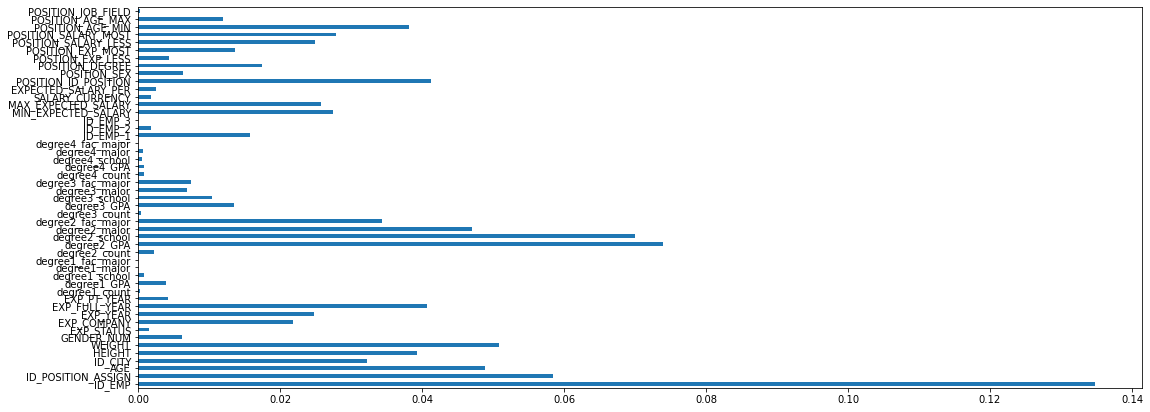

In [ ]:
%matplotlib inline
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));


In [ ]:
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(30)


ID_POSITION_ASSIGN      0.137361
degree2_GPA             0.086028
EXP_FULL_YEAR           0.076763
POSITION_ID_POSITION    0.068241
POSITION_SALARY_MOST    0.058013
POSTION_EXP_LESS        0.056053
degree2_major           0.054460
degree2_school          0.053779
AGE                     0.049057
degree2_fac_major       0.037281
MAX_EXPECTED_SALARY     0.035893
MIN_EXPECTED_SALARY     0.034825
ID_CITY                 0.032949
EXP_YEAR                0.026782
POSITION_SEX            0.026249
EXP_COMPANY             0.025364
POSITION_DEGREE         0.018996
ID_EMP_1                0.018776
POSITION_EXP_MOST       0.016514
degree3_school          0.010590
POSITION_SALARY_LESS    0.010178
GENDER_NUM              0.008540
degree3_GPA             0.008195
EXP_PT_YEAR             0.006585
POSITION_AGE_MAX        0.005605
EXP_STATUS              0.004910
EXPECTED_SALARY_PER     0.004040
degree4_GPA             0.003919
degree1_GPA             0.003862
degree3_fac_major       0.002954
dtype: flo

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(decision_tree_classifier, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifier object
tree = RandomForestClassifier(max_depth=20, n_estimators=30, max_features=20,criterion="entropy")

# Train Decision Tree Classifier
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.823076923076923

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))

Confusion Matrix (predict/actual):
     0   1
0  77  14
1  15  24


In [ ]:
pred = tree.predict_proba(X_test)

In [ ]:
pred[11:30]

array([[0.92144686, 0.07855314],
       [0.94972881, 0.05027119],
       [0.94571547, 0.05428453],
       [0.93387655, 0.06612345],
       [0.89327954, 0.10672046],
       [0.89657329, 0.10342671],
       [0.91503092, 0.08496908],
       [0.96626644, 0.03373356],
       [0.96773346, 0.03226654],
       [0.88789216, 0.11210784],
       [0.96936351, 0.03063649],
       [0.94656581, 0.05343419],
       [0.9291677 , 0.0708323 ],
       [0.93460229, 0.06539771],
       [0.92801367, 0.07198633],
       [0.94068512, 0.05931488],
       [0.80110635, 0.19889365],
       [0.95174571, 0.04825429],
       [0.88575849, 0.11424151]])